# Speckle tracking coregistered SLCs with autoRIFT

In [1]:
# Import required packages
import os
import sys
import getpass
#import asf_search as asf
import logging
import isce
root_logger = logging.getLogger()
root_logger.setLevel('WARNING')
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from datetime import datetime, timedelta
import time
from glob import glob
import asf_search as asf

## Coregister stack of SLCs

In [11]:
# Set environment variables to call ISCE from the command line
os.environ['ISCE_HOME'] = os.path.dirname(isce.__file__)
os.environ['ISCE_ROOT'] = os.path.dirname(os.environ['ISCE_HOME'])
os.environ['ISCE_STACK'] = '/mnt/Backups/gbrench/sw/insar_tools/isce2/src/isce2/contrib/stack'
os.environ['PYTHONPATH'] = os.environ['ISCE_STACK']
os.environ['PATH'] += f":{os.environ['ISCE_STACK']}/topsStack"

In [2]:
scene_list=[
'S1A_IW_SLC__1SDV_20191004T121345_20191004T121412_029309_0354B0_F48E',
'S1A_IW_SLC__1SDV_20191016T121345_20191016T121412_029484_035ABB_373F',
'S1A_IW_SLC__1SDV_20191028T121345_20191028T121412_029659_0360C3_574E',
'S1A_IW_SLC__1SDV_20191109T121345_20191109T121412_029834_0366F3_462C',
'S1A_IW_SLC__1SDV_20191121T121344_20191121T121411_030009_036CFD_787C',
'S1A_IW_SLC__1SDV_20191203T121344_20191203T121411_030184_03730F_4C1A',
'S1A_IW_SLC__1SDV_20191215T121344_20191215T121411_030359_03791A_4B57',
'S1A_IW_SLC__1SDV_20191227T121343_20191227T121410_030534_037F23_3C47',
'S1A_IW_SLC__1SDV_20200108T121343_20200108T121410_030709_038533_C53D',
'S1A_IW_SLC__1SDV_20200120T121342_20200120T121409_030884_038B59_8828',
'S1A_IW_SLC__1SDV_20200201T121342_20200201T121409_031059_039174_1908',
'S1A_IW_SLC__1SDV_20200213T121341_20200213T121408_031234_039785_41EB',
'S1A_IW_SLC__1SDV_20200225T121341_20200225T121408_031409_039D91_8F87',
'S1A_IW_SLC__1SDV_20200308T121341_20200308T121408_031584_03A39B_6624',
'S1A_IW_SLC__1SDV_20200320T121342_20200320T121409_031759_03A9BC_08F7',
'S1A_IW_SLC__1SDV_20200401T121342_20200401T121409_031934_03AFE6_E721',
'S1A_IW_SLC__1SDV_20200413T121342_20200413T121409_032109_03B610_2EA6',
'S1A_IW_SLC__1SDV_20200425T121343_20200425T121410_032284_03BC35_898C'
           ]

In [4]:
proc_path = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12'

In [6]:
# download slcs
results = asf.granule_search(scene_list)
results.download(path=f'{proc_path}/slc', processes=2)

In [9]:
# download dem
os.chdir(f'{proc_path}/dem')
!sardem --bbox 85.9 27.1 87.6 28.6 --xrate 3 --yrate 3 --data-source COP -isce

[10/12 12:09:16] [INFO dem.py] Bounds: 85.9 27.1 87.6 28.6
[10/12 12:09:17] [INFO cop_dem.py] Creating elevation.dem
[10/12 12:09:17] [INFO cop_dem.py] Fetching remote tiles...
[10/12 12:09:17] [INFO cop_dem.py] Running GDAL command:
[10/12 12:09:17] [INFO cop_dem.py] gdalwarp /vsicurl/https://raw.githubusercontent.com/scottstanie/sardem/master/sardem/data/cop_global.vrt elevation.dem -of ENVI -ot Int16 -te 85.9000000000000057 27.1000000000000014 87.5999999999999943 28.6000000000000014 -tr 9.2592592592592588e-05 9.2592592592592588e-05 -s_srs "epsg:4326+3855" -t_srs "epsg:4326" -wo NUM_THREADS=4 -r bilinear -wm 5000 -multi
Creating output file that is 18360P x 16200L.
0...10...20...30...40...50...60...70...80...90...100 - done.
[10/12 12:15:50] [INFO dem.py] Creating ISCE2 XML file
Writing geotrans to VRT for /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/dem/elevation.dem


In [36]:
# stacksentinel to generate run files
os.chdir(proc_path)
!stackSentinel.py -s ./slc -o ./orbits -a ./aux -d ./dem/elevation.dem -w ./work -C geometry --bbox '27.3 28.3 86.1 87.4' -W slc -C geometry --num_proc 2

Number of SAFE files found: 18
*****************************************
20191004
orbit was not found in the /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/orbits
downloading precise or restituted orbits ...
fetchOrbit.py -i /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191004T121345_20191004T121412_029309_0354B0_F48E.zip -o /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/orbits/20191004
Reference time:  2019-10-04 12:14:12
Satellite name:  S1A
*****************************************
20191016
orbit was not found in the /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/orbits
downloading precise or restituted orbits ...
fetchOrbit.py -i /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191016T121345_20191016T121412_029484_035ABB_373F.zip -o /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/orbits/20191016
Reference time:  2019-10-16 12:14:12
Satellite name:  S1A
*****************

In [37]:
%%time
!sh ./work/run_files/run_01_unpack_topo_reference

Completed Parsing the Configuration file
Functions to be executed:
['Function-1', 'Function-2']
Running: Sentinel1_TOPS
['--dirname', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191004T121345_20191004T121412_029309_0354B0_F48E.zip', '--swaths', '1 2 3', '--orbit', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/orbits/20191004/S1A_OPER_AUX_POEORB_OPOD_20210314T115943_V20191003T225942_20191005T005942.EOF', '--outdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--auxdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/aux', '--bbox', '27.3 28.3 86.1 87.4', '--pol', 'vv']
Input XML files:  ['/vsizip//mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191004T121345_20191004T121412_029309_0354B0_F48E.zip/S1A_IW_SLC__1SDV_20191004T121345_20191004T121412_029309_0354B0_F48E.SAFE/annotation/s1a-iw1-slc-vv-20191004t121347-20191004t121412-029309-0354b0-004.xml']
Input TIFF f

In [38]:
%%time
!sh ./work/run_files/run_02_unpack_secondary_slc

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: Sentinel1_TOPS
['--dirname', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191028T121345_20191028T121412_029659_0360C3_574E.zip', '--swaths', '1 2 3', '--orbit', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/orbits/20191028/S1A_OPER_AUX_POEORB_OPOD_20210314T192858_V20191027T225942_20191029T005942.EOF', '--outdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191028', '--auxdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/aux', '--bbox', '27.3 28.3 86.1 87.4', '--pol', 'vv']
Running: Sentinel1_TOPS
['--dirname', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/slc/S1A_IW_SLC__1SDV_20191016T121345_20191016T121412_029484_035ABB_373F.zip', '--swaths', '1 2 3', '--orbit', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/

In [39]:
%%time
!sh ./work/run_files/run_03_average_baseline

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: computeBaseline
['--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference/', '--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191028', '--baseline_file', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/baselines/20191004_20191028/20191004_20191028.txt']
Running: computeBaseline
['--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference/', '--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191016', '--baseline_file', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/baselines/20191004_20191016/20191004_20191016.txt']
minSecondary,maxSecondary 1 5
minReference,maxReference 1 5
minBurst, maxBurst:  1 5
Polynomial Order: 0 - by - 0 
0	
minSecondary,max

In [40]:
%%time
!sh ./work/run_files/run_04_fullBurst_geo2rdr

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: geo2rdr
Running: geo2rdr
['--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191028', '--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--geom_referenceDir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/geom_reference', '--coregSLCdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191028', '--azimuth_misreg', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/misreg/azimuth/dates/20191028.txt', '--range_misreg', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/misreg/range/dates/20191028.txt']
['--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191016', '--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_pu

In [41]:
%%time
!sh ./work/run_files/run_05_fullBurst_resample

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: resamp_withCarrier
['--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191028', '--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--coregdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191028', '--azimuth_misreg', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/misreg/azimuth/dates/20191028.txt', '--range_misreg', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/misreg/range/dates/20191028.txt']
Running: resamp_withCarrier
['--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191016', '--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--coregdir', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/a

In [42]:
%%time
!sh ./work/run_files/run_06_extract_stack_valid_region

creating  /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/stack
checking the number of bursts in coreg_secondarys against the one in reference
all secondary images have the same number of bursts as the reference
******************
swath:  1
/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191016
minSecondary,maxSecondary 1 5
minReference,maxReference 1 5
minBurst, maxBurst:  1 5
/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191028
minSecondary,maxSecondary 1 5
minReference,maxReference 1 5
minBurst, maxBurst:  1 5
/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191109
minSecondary,maxSecondary 1 5
minReference,maxReference 1 5
minBurst, maxBurst:  1 5
/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/coreg_secondarys/20191121
minSecondary,maxSecondary 1 5
minReference,maxReference 1 5
minBurst, maxBurst:  1 5
/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/A

In [43]:
%%time
!sh ./work/run_files/run_07_merge_reference_secondary_slc

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: mergeBursts
['--stack', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/stack', '--inp_reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--dirname', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference', '--name_pattern', 'burst*slc', '--outfile', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/merged/SLC/20191004/20191004.slc', '--method', 'top', '--valid_only', '--range_looks', '9', '--azimuth_looks', '3']
Updating the valid region of each burst to the common valid region of the stack
bursts:  1 5
Updating the valid region of each burst to the common valid region of the stack
bursts:  1 5
writing merged file to disk via gdal.Translate ...
00.........41..51..61.70...80.90..100 
Skipping multi-looking ....
Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: mergeBursts
['

In [44]:
%%time
!sh ./work/run_files/run_08_grid_baseline

Completed Parsing the Configuration file
Functions to be executed:
['Function-1']
Running: baselineGrid
['--reference', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/reference/', '--secondary', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/secondarys/20191016', '--baseline_file', '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/merged/baselines/20191016/20191016']
Baseline file /mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/merged/baselines/20191016/20191016 dims: 16L x 16P
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 

In [64]:
# examine slcs
fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work/merged/SLC/20191004/20191004.slc.full'
def plotcomplexdata(GDALfilename,
                    aspect=1,
                    datamin=None, datamax=None,
                    interpolation='nearest',
                    draw_colorbar=None, colorbar_orientation="horizontal"):
    # Load the data into numpy array
    ds = gdal.Open(GDALfilename, gdal.GA_ReadOnly)
    slc = ds.GetRasterBand(1).ReadAsArray()
    transform = ds.GetGeoTransform()
    ds = None
    
    # getting the min max of the axes
    firstx = transform[0]
    firsty = transform[3]
    deltay = transform[5]
    deltax = transform[1]
    lastx = firstx+slc.shape[1]*deltax
    lasty = firsty+slc.shape[0]*deltay
    ymin = np.min([lasty,firsty])
    ymax = np.max([lasty,firsty])
    xmin = np.min([lastx,firstx])
    xmax = np.max([lastx,firstx])

    # put all zero values to nan and do not plot nan
    try:
        slc[slc==0]=np.nan
    except:
        pass

    
    f, ax = plt.subplots(2, 1, figsize=(10, 6))
    cax1=ax[0].imshow(np.abs(slc), vmin = datamin, vmax=datamax,
                   cmap='Greys', extent=[xmin,xmax,ymin,ymax],
                   interpolation=interpolation)
    ax[0].set_title('amplitude')
    if draw_colorbar is not None:
        cbar1 = f.colorbar(cax1, shrink=0.2)
    ax[0].set_aspect(aspect)

    cax2 =ax[1].imshow(np.angle(slc), cmap='rainbow',
                    vmin=-np.pi, vmax=np.pi,
                    extent=[xmin,xmax,ymin,ymax],
                    interpolation=interpolation)
    ax[1].set_title('phase [rad])')
    if draw_colorbar is not None:
        cbar2 = f.colorbar(cax2, shrink=0.2)
    ax[1].set_aspect(aspect)
    f.tight_layout()
    
    # clearing the data
    slc = None

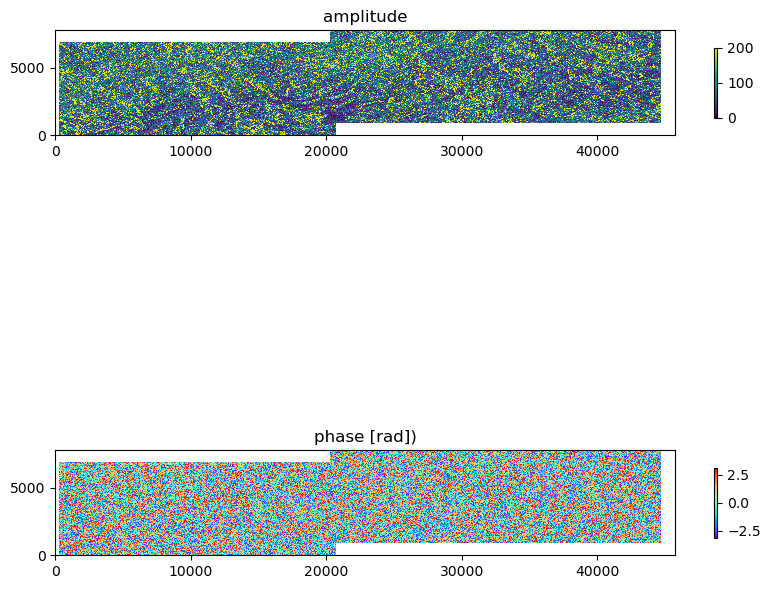

In [65]:
plotcomplexdata(fn, datamin=0, datamax=250, draw_colorbar=True)

# speckle tracking with autoRIFT

In [ ]:
def select_pairs(scene_list, max_temp_bline):
    scene_dates = {}
    for scene in scene_list:
        date = scene[17:25]
        scene_dates[date] = scene

    pairs = []
    for date1 in scene_dates:
        for date2 in scene_dates:
            if datetime.strptime(date2, '%Y%m%d')-datetime.strptime(date1, '%Y%m%d') < timedelta(days=max_temp_bline) and not date1 >= date2 :
                pairs.append([date1, date2])
    
    print(f'number of pairs: {len(pairs)}')
    
    return pairs

In [ ]:
pairs = select_pairs(scene_list, 365)

In [ ]:
!testautoRIFT_ISCE.py 